In [1]:
# Load the important stuff for the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# will show plots without doing plt.show()
%matplotlib inline

#### Look at my data

In [2]:
!head iris.csv

Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


#### Load the dataset

In [3]:
# read the csv into a dataframe# encoding of latin-1 came from site https://www.kaggle.com/benvozza/spam-classification
df = pd.read_csv("iris.csv",encoding='utf-8')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### A Little EDA

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


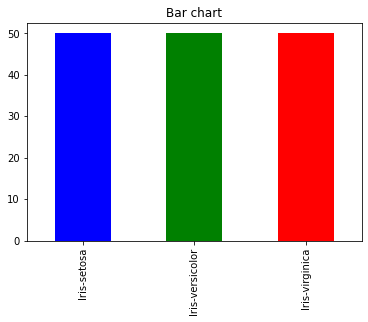

In [5]:
# https://www.kaggle.com/pablovargas/naive-bayes-svm-spam-filtering
# bar chart to show the split between ham and spam text

counts_by_species=pd.value_counts(df['Species'], sort= True)
counts_by_species.plot(kind= 'bar', color= ["blue","green", "red"])
plt.title('Bar chart')

print(counts_by_species)

### KNN
#### Split the dataset

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.drop('Id', axis = 1,inplace=True)

In [8]:
#gather up names of all the columns
cols = df.columns

#set the prediction column and the feature columns for KNN
prediction_col = 'Species'
feature_cols = [c for c in cols if c != prediction_col]
X = df[feature_cols].values
y = df[prediction_col].values

#splitting into 80/20 train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [9]:
#verify the size of each data set
print([np.shape(X_train), np.shape(X_test)])

[(120, 4), (30, 4)]


#### Determine the optimal number of clusters

In [10]:
# determine the optimal number of clusters
scores = []

# gather the accuracy for lots of different models
for k in range(2, 30):
    print(' '*3,'Running for',k,'-nearest neighbors')
    
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

    Running for 2 -nearest neighbors
    Running for 3 -nearest neighbors
    Running for 4 -nearest neighbors
    Running for 5 -nearest neighbors
    Running for 6 -nearest neighbors
    Running for 7 -nearest neighbors
    Running for 8 -nearest neighbors
    Running for 9 -nearest neighbors
    Running for 10 -nearest neighbors
    Running for 11 -nearest neighbors
    Running for 12 -nearest neighbors
    Running for 13 -nearest neighbors
    Running for 14 -nearest neighbors
    Running for 15 -nearest neighbors
    Running for 16 -nearest neighbors
    Running for 17 -nearest neighbors
    Running for 18 -nearest neighbors
    Running for 19 -nearest neighbors
    Running for 20 -nearest neighbors
    Running for 21 -nearest neighbors
    Running for 22 -nearest neighbors
    Running for 23 -nearest neighbors
    Running for 24 -nearest neighbors
    Running for 25 -nearest neighbors
    Running for 26 -nearest neighbors
    Running for 27 -nearest neighbors
    Running for 28 -

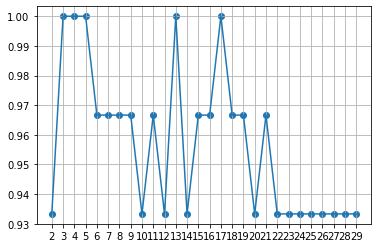

In [11]:
#display the resutls
plt.plot(range(2, 30), scores)
plt.scatter(range(2, 30), scores)
plt.grid()
_ =plt.xticks(range(2, 30))

#### Very interesting graph! The rule of thumb is to take the first instance of the highest value.  so that would be k=3.

In [12]:
# run the model for the optimal number of clusters
model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [13]:
# display the actuals and predictions for the test set
print('Actuals for test data set')
print(y_test)
print('Predictions for test data set')
print(preds)

Actuals for test data set
['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa']
Predictions for test data set
['Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor

<AxesSubplot:>

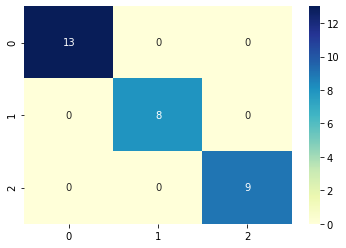

In [14]:
# https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression
# make a confusion matrix to display the results
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
confusion_matrix=pd.DataFrame(data=cm)

#display the matrix
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [15]:
#using the sklearn.metrics package to determine the accuracy of the model
print(accuracy_score(y_test,preds))

1.0


Compare the resutls with the actual

In [16]:
# compare the two outputs
for i in range(len(preds)):
    print(y_test[i],preds[i])

Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-virginica Iris-virginica
Iris-setosa Iris-setosa
Iris-versicolor Iris-versicolor
Iris-setosa Iris-setosa
Iris-setosa Iris-setosa


#### My question, why did this model do so well?  This is actually odd..
Did we need to convert the target column to be a numerical

In [17]:
# possible flower types: Iris-setosa, Iris-virginica, Iris-versicolor
flower_label = {'Iris-setosa':0, 'Iris-virginica':1, 'Iris-versicolor':2}

y_test = [flower_label[item] for item in y_test]
y_train = [flower_label[item] for item in y_train]

In [18]:
# determine the optimal number of clusters
scores = []

# gather the accuracy for lots of different models
for k in range(2, 30):
    print(' '*3,'Running for',k,'-nearest neighbors')
    
    model = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

    Running for 2 -nearest neighbors
    Running for 3 -nearest neighbors
    Running for 4 -nearest neighbors
    Running for 5 -nearest neighbors
    Running for 6 -nearest neighbors
    Running for 7 -nearest neighbors
    Running for 8 -nearest neighbors
    Running for 9 -nearest neighbors
    Running for 10 -nearest neighbors
    Running for 11 -nearest neighbors
    Running for 12 -nearest neighbors
    Running for 13 -nearest neighbors
    Running for 14 -nearest neighbors
    Running for 15 -nearest neighbors
    Running for 16 -nearest neighbors
    Running for 17 -nearest neighbors
    Running for 18 -nearest neighbors
    Running for 19 -nearest neighbors
    Running for 20 -nearest neighbors
    Running for 21 -nearest neighbors
    Running for 22 -nearest neighbors
    Running for 23 -nearest neighbors
    Running for 24 -nearest neighbors
    Running for 25 -nearest neighbors
    Running for 26 -nearest neighbors
    Running for 27 -nearest neighbors
    Running for 28 -

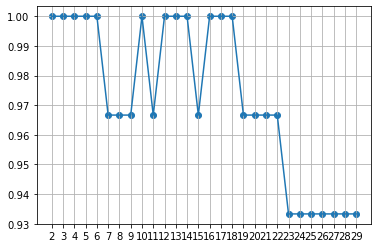

In [19]:
#display the resutls
plt.plot(range(2, 30), scores)
plt.scatter(range(2, 30), scores)
plt.grid()
_ =plt.xticks(range(2, 30))

In [20]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


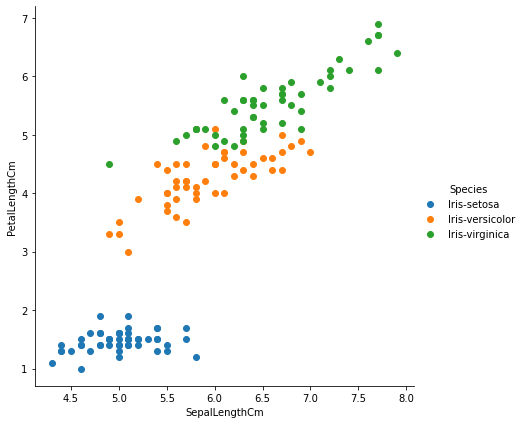

In [21]:
sns.FacetGrid(df, hue ="Species",
              height = 6).map(plt.scatter,
                              'SepalLengthCm',
                              'PetalLengthCm').add_legend()

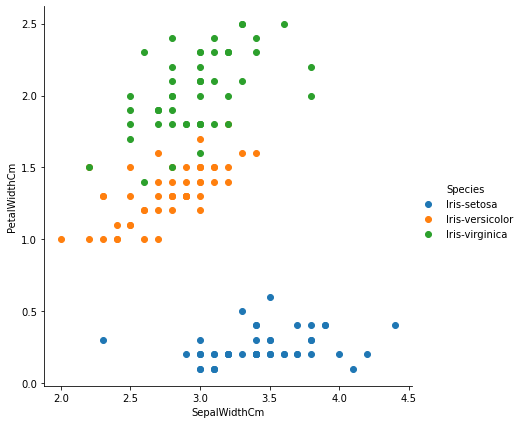

In [22]:
sns.FacetGrid(df, hue ="Species",
              height = 6).map(plt.scatter,
                              'SepalWidthCm',
                              'PetalWidthCm').add_legend()